## IMPORT 

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.fftpack
from pykalman import KalmanFilter
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objects as go
from scipy.signal import butter, lfilter, freqz
from scipy import signal
%matplotlib inline


## FUNGSI BANDPASS FILTER

In [2]:
#Bandpass

def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter2(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    # y =filtfilt(b, a, data)
    return y

## IMPORT DATA

In [3]:
data_raw = pd.read_excel('C:/Users/stana/Documents/UTS S2/TUGAS UTS 2021-11-17 20-13-35.xls')
# data_raw.columns=["Time (s)","Linear Acceleration x (m/s^2)","Linear Acceleration y (m/s^2)","Linear Acceleration z (m/s^2)"]
waktu = data_raw['Time (s)']
Ax = data_raw['Linear Acceleration x (m/s^2)']
Ay = data_raw['Linear Acceleration y (m/s^2)']
Az = data_raw['Linear Acceleration z (m/s^2)']
Az=Az-(sum(Az)/np.size(Az))
Ay=Ay-(sum(Ay)/np.size(Ay))
Ax=Ax-(sum(Ax)/np.size(Ax))

## Custom Warna

In [4]:
colors = ["windows red", "amber", "faded green", "dusty purple"]
sns.set(rc={"figure.figsize": (20,6), "axes.titlesize" : 18, "axes.labelsize" : 12, 
            "xtick.labelsize" : 14, "ytick.labelsize" : 14 })

## ACCELERATION x

<function matplotlib.pyplot.show(close=None, block=None)>

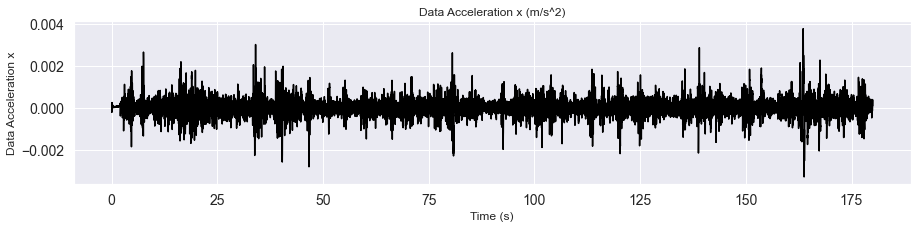

In [5]:
plt.subplots(figsize=(15,3))
plt.title('Data Acceleration x (m/s^2)', fontsize=12)
plt.plot(waktu,Ax,color = 'black')
plt.xlabel("Time (s)")
plt.ylabel("Data Acceleration x")
plt.show


## ACCELERATION y

<function matplotlib.pyplot.show(close=None, block=None)>

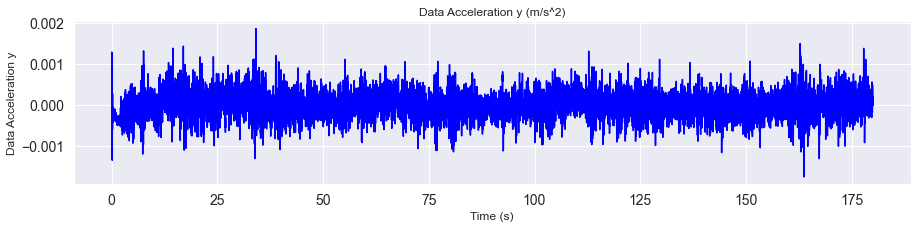

In [6]:
plt.subplots(figsize=(15,3))
plt.title('Data Acceleration y (m/s^2)', fontsize=12)
plt.plot(waktu,Ay,color = 'blue')
plt.xlabel("Time (s)")
plt.ylabel("Data Acceleration y")
plt.show

## ACCELERATION z

<function matplotlib.pyplot.show(close=None, block=None)>

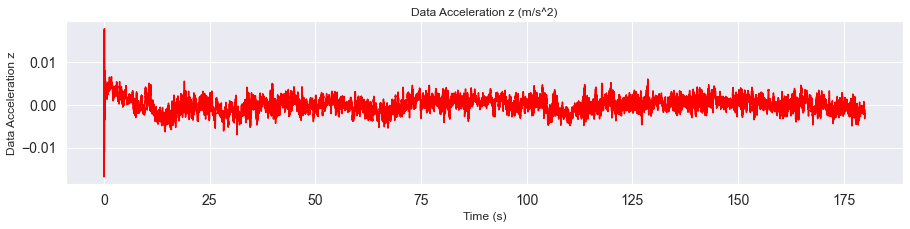

In [7]:
plt.subplots(figsize=(15,3))
plt.title('Data Acceleration z (m/s^2)', fontsize=12)
plt.plot(waktu,Az,color = 'red')
plt.xlabel("Time (s)")
plt.ylabel("Data Acceleration z")
plt.show

## FFT ACCELERATION x Sebelum dan Sesudah FFT

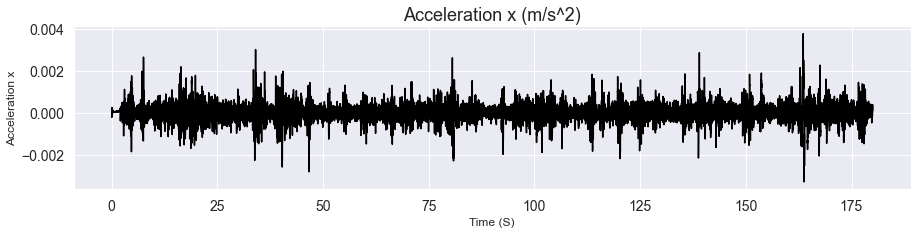

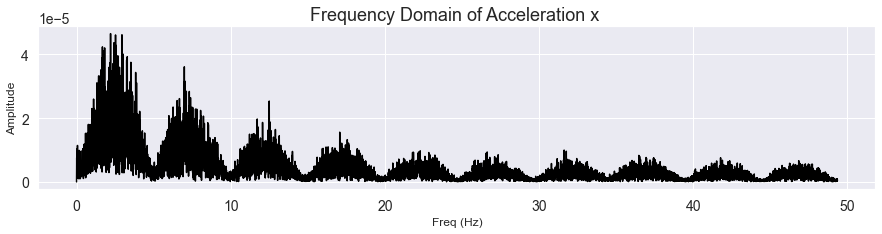

Nilai Natural Frekuensi Sebelum Filter   :  2.205989596264118 Hz
Nilai Magnitude/Amplitude Sebelum Filter :  4.6487493937480236e-05
Range Frekuensi :  0.1 - 10 Hz


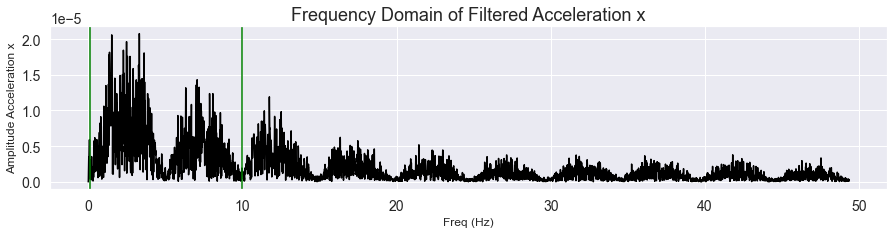

Nilai Natural Frekuensi Sesudah Filter   :  3.31731936768181 Hz
Nilai Magnitude/Amplitude Sesudah Filter :  2.0763661287672585e-05
Range Frekuensi :  0.1 - 10 Hz


In [8]:
Tx = waktu[1]-waktu[0]   
Nx = len(Ax)                       
yx = Ax.to_numpy() 
yx = yx - np.ones_like(yx)*np.mean(yx) #Normalisasi 

fft_yx = scipy.fftpack.fft(yx)
fft_xx = np.linspace(0.0, 1.0/(2.0*Tx), int(Nx/2))

plt.subplots(figsize=(15,3))
plt.plot(waktu,Ax,color = 'black')
plt.xlabel("Time (S)")
plt.ylabel("Acceleration x")
plt.title('Acceleration x (m/s^2)')
plt.show()  

plt.subplots(figsize=(15,3))
plt.plot(fft_xx,2.0/Nx * np.abs(fft_yx[:Nx//2]),color = 'black')
plt.xlabel("Freq (Hz)")
plt.ylabel("Amplitude")
plt.title('Frequency Domain of Acceleration x ')
plt.show()

fft_xmax = 2.0/Nx * np.abs(fft_yx[:Nx//2])
magmax = max(fft_xmax)
# print(magmax)
for i in range(len(fft_xmax)):
    if fft_xmax[i]==magmax :
        nilaiFreq = fft_xx[i]
        nilaiMagnitude = fft_xmax[i]
        nilaiWaktu = waktu[i]
        print("Nilai Natural Frekuensi Sebelum Filter   : ",fft_xx[i],'Hz')
        print("Nilai Magnitude/Amplitude Sebelum Filter : ",fft_xmax[i])

f_low_Ax = 0.1 #Cutoff bawah 
f_high_Ax =10 #Cutoff atas
fs_Ax = 1/Tx #Sampling Frequency 

print("Range Frekuensi : ",f_low_Ax,"-",f_high_Ax,"Hz")

#Band pass filter
# Filtered Data
filter_fftx = butter_bandpass_filter2(fft_yx,f_low_Ax, f_high_Ax, fs_Ax, order=4) 
 
##response
b, a = butter_bandpass(f_low_Ax,f_high_Ax, fs_Ax, order=4)
# Plot the frequency response.
w, h = freqz(b, a, worN=64)

plt.subplots(figsize=(15,3))
plt.plot(fft_xx,2.0/Nx * np.abs(filter_fftx[:Nx//2]),color = 'black')
plt.axvline(f_low_Ax,color = 'green')
plt.axvline(f_high_Ax,color ='green')
plt.xlabel("Freq (Hz)")
plt.ylabel("Amplitude Acceleration x")
plt.title('Frequency Domain of Filtered Acceleration x')
plt.show()

fft_xmax_filter = 2.0/Nx * np.abs(filter_fftx[:Nx//2])
magmax = max(fft_xmax_filter)
# print(magmax)
for i in range(len(fft_xmax_filter)):
    if fft_xmax_filter[i]==magmax :
        nilaiFreq = fft_xx[i]
        nilaiMagnitude = fft_xmax_filter[i]
        nilaiWaktu = waktu[i]
        print("Nilai Natural Frekuensi Sesudah Filter   : ",fft_xx[i],'Hz')
        print("Nilai Magnitude/Amplitude Sesudah Filter : ",fft_xmax_filter[i])
        
print("Range Frekuensi : ",f_low_Ax,"-",f_high_Ax,"Hz")


## FFT ACCELERATION y Sebelum dan Sesudah FFT

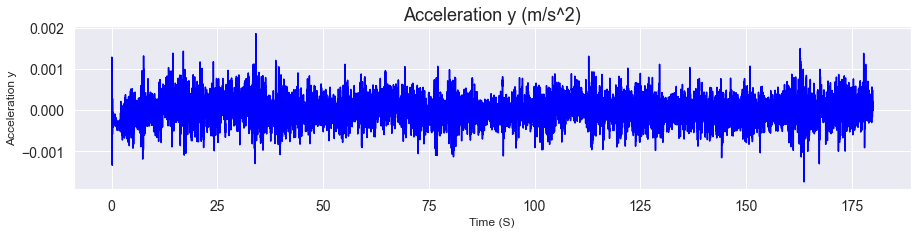

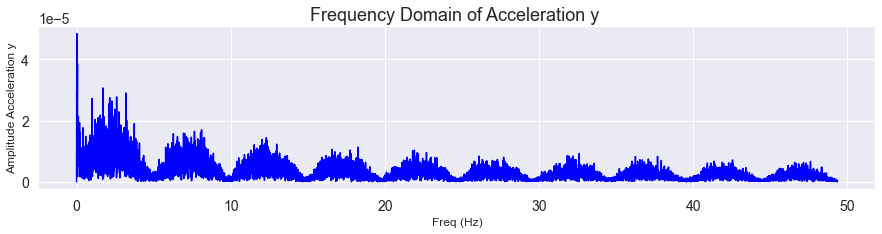

Nilai Natural Frekuensi Sebelum Filter   :  0.022226595428353833 Hz
Nilai Magnitude/Amplitude Sebelum Filter :  4.839065435297858e-05
Range Frekuensi :  0.1 - 5 Hz


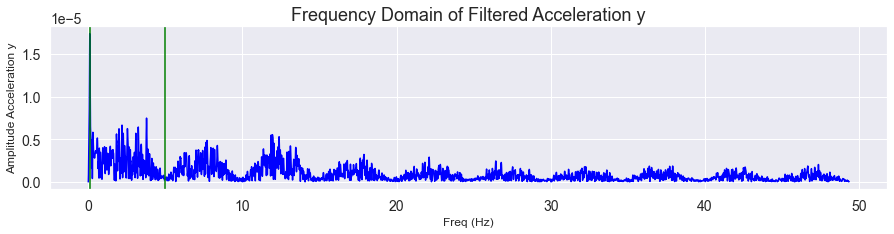

Nilai Natural Frekuensi Sesudah Filter   :  0.1055763282846807 Hz
Nilai Magnitude/Amplitude Sesudah Filter :  1.7374504357599193e-05
Range Frekuensi :  0.1 - 5 Hz


In [9]:
Ty = waktu[1]-waktu[0]   
Ny= len(Ay)                       
yy = Ay.to_numpy() 
yy = yy - np.ones_like(yy)*np.mean(yy) #Normalisasi 
fft_yy = scipy.fftpack.fft(yy)
fft_xy = np.linspace(0.0, 1.0/(2.0*Ty), int(Ny/2))

plt.subplots(figsize=(15,3))
plt.plot(waktu,Ay,color = 'blue')
plt.xlabel("Time (S)")
plt.ylabel("Acceleration y")
plt.title('Acceleration y (m/s^2)')
plt.show()  

plt.subplots(figsize=(15,3))
plt.plot(fft_xy,2.0/Ny * np.abs(fft_yy[:Ny//2]),color = 'blue')
plt.xlabel("Freq (Hz)")
plt.ylabel("Amplitude Acceleration y")
plt.title('Frequency Domain of Acceleration y ')
plt.show()

fft_ymax = 2.0/Ny * np.abs(fft_yy[:Ny//2])
magmax = max(fft_ymax)
# print(magmax)
for i in range(len(fft_ymax)):
    if fft_ymax[i]==magmax :
        nilaiFreq = fft_xy[i]
        nilaiMagnitude = fft_xmax[i]
        nilaiWaktu = waktu[i]
        print("Nilai Natural Frekuensi Sebelum Filter   : ",fft_xy[i],'Hz')
        print("Nilai Magnitude/Amplitude Sebelum Filter : ",fft_ymax[i])


f_low_Ay = 0.1 #Cutoff bawah 
f_high_Ay =5 #Cutoff atas
fs_Ay = 1/Ty #Sampling Frequency 

print("Range Frekuensi : ",f_low_Ay,"-",f_high_Ay,"Hz")

#Band pass filter
# Filtered Data
filter_ffty = butter_bandpass_filter2(fft_yy,f_low_Ay, f_high_Ay, fs_Ay, order=4) 
 
##response
b, a = butter_bandpass(f_low_Ay,f_high_Ay, fs_Ay, order=4)
# Plot the frequency response.
w, h = freqz(b, a, worN=64)

plt.subplots(figsize=(15,3))
plt.plot(fft_xy,2.0/Ny * np.abs(filter_ffty[:Ny//2]),color = 'blue')
plt.axvline(f_low_Ay,color = 'green')
plt.axvline(f_high_Ay,color ='green')
plt.xlabel("Freq (Hz)")
plt.ylabel("Amplitude Acceleration y")
plt.title('Frequency Domain of Filtered Acceleration y')
plt.show()

fft_ymax_filter = 2.0/Ny * np.abs(filter_ffty[:Ny//2])
magmax = max(fft_ymax_filter)
# print(magmax)
for i in range(len(fft_ymax_filter)):
    if fft_ymax_filter[i]==magmax :
        nilaiFreq = fft_xy[i]
        nilaiMagnitude = fft_ymax_filter[i]
        nilaiWaktu = waktu[i]
        print("Nilai Natural Frekuensi Sesudah Filter   : ",fft_xy[i],'Hz')
        print("Nilai Magnitude/Amplitude Sesudah Filter : ",fft_ymax_filter[i])

print("Range Frekuensi : ",f_low_Ay,"-",f_high_Ay,"Hz")




## FFT ACCELERATION z Sebelum dan Sesudah FFT

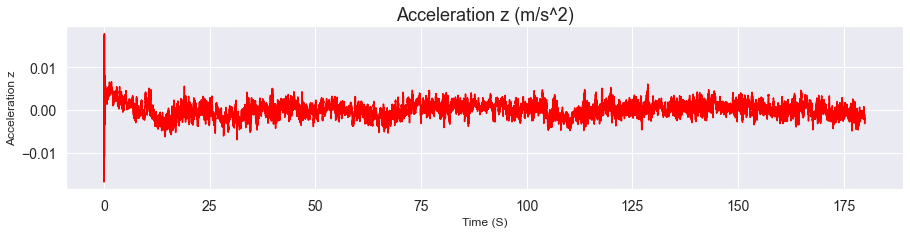

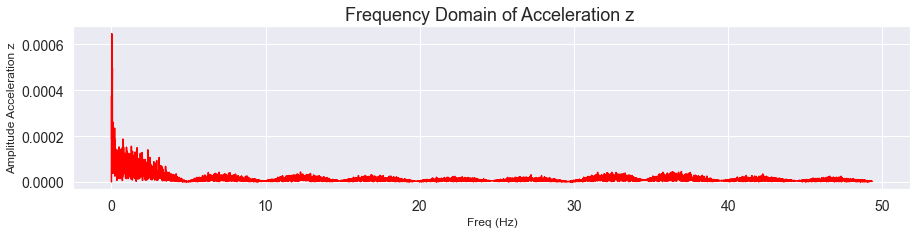

Nilai Natural Frekuensi Sebelum Filter   :  0.022226595428353833 Hz
Nilai Magnitude/Amplitude Sebelum Filter :  0.0006468952181878609
Range Frekuensi :  0.1 - 3 Hz


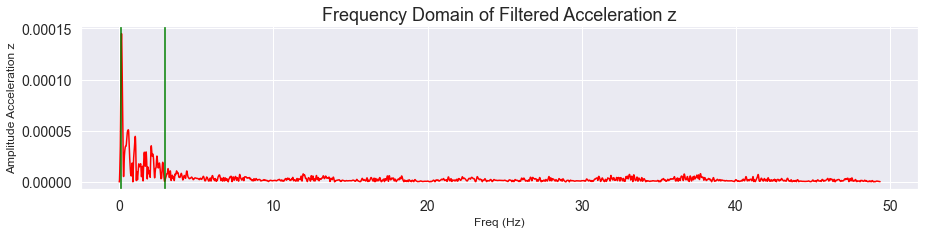

Nilai Natural Frekuensi Sesudah Filter   :  0.15002951914138837 Hz
Nilai Magnitude/Amplitude Sesudah Filter :  0.0001448949314022299
Range Frekuensi :  0.1 - 3 Hz


In [10]:
Tz = waktu[1]-waktu[0]   
Nz= len(Az)                       
yz = Az.to_numpy() 
yz = yz - np.ones_like(yz)*np.mean(yz) #Normalisasi 
fft_yz = scipy.fftpack.fft(yz)
fft_xz = np.linspace(0.0, 1.0/(2.0*Tz), int(Nz/2))

plt.subplots(figsize=(15,3))
plt.plot(waktu,Az,color = 'red')
plt.xlabel("Time (S)")
plt.ylabel("Acceleration z")
plt.title('Acceleration z (m/s^2)')
plt.show()  

plt.subplots(figsize=(15,3))
plt.plot(fft_xz,2.0/Nz * np.abs(fft_yz[:Nz//2]),color = 'red')
plt.xlabel("Freq (Hz)")
plt.ylabel("Amplitude Acceleration z")
plt.title('Frequency Domain of Acceleration z ')
plt.show()

fft_zmax = 2.0/Nz * np.abs(fft_yz[:Nz//2])
magmax = max(fft_zmax)
# print(magmax)
for i in range(len(fft_zmax)):
    if fft_zmax[i]==magmax :
        nilaiFreq = fft_xz[i]
        nilaiMagnitude = fft_zmax[i]
        nilaiWaktu = waktu[i]
        print("Nilai Natural Frekuensi Sebelum Filter   : ",fft_xz[i],'Hz')
        print("Nilai Magnitude/Amplitude Sebelum Filter : ",fft_zmax[i])

f_low_Az = 0.1 #Cutoff bawah 
f_high_Az =3 #Cutoff atas
fs_Az = 1/Tz #Sampling Frequency 

print("Range Frekuensi : ",f_low_Az,"-",f_high_Az,"Hz")

#Band pass filter
# Filtered Data
filter_fftz = butter_bandpass_filter2(fft_yz,f_low_Az, f_high_Az, fs_Az, order=4) 
 
##response
b, a = butter_bandpass(f_low_Az,f_high_Az, fs_Az, order=4)
# Plot the frequency response.
w, h = freqz(b, a, worN=64)

plt.subplots(figsize=(15,3))
plt.plot(fft_xz,2.0/Nz * np.abs(filter_fftz[:Nz//2]),color = 'red')
plt.axvline(f_low_Az,color = 'green')
plt.axvline(f_high_Az,color ='green')
plt.xlabel("Freq (Hz)")
plt.ylabel("Amplitude Acceleration z")
plt.title('Frequency Domain of Filtered Acceleration z')
plt.show()

fft_zmax_filter = 2.0/Nz * np.abs(filter_fftz[:Nz//2])
magmax = max(fft_zmax_filter)
# print(magmax)
for i in range(len(fft_zmax_filter)):
    if fft_zmax_filter[i]==magmax :
        nilaiFreq = fft_xz[i]
        nilaiMagnitude = fft_zmax_filter[i]
        nilaiWaktu = waktu[i]
        print("Nilai Natural Frekuensi Sesudah Filter   : ",fft_xz[i],'Hz')
        print("Nilai Magnitude/Amplitude Sesudah Filter : ",fft_zmax_filter[i])

print("Range Frekuensi : ",f_low_Az,"-",f_high_Az,"Hz")

## APLIKASI CLASSIFICATION Linear Acceleration X

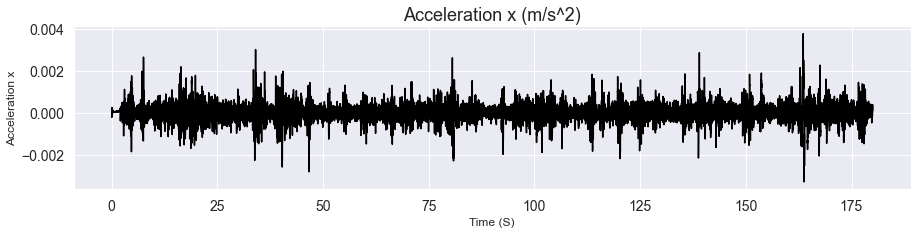

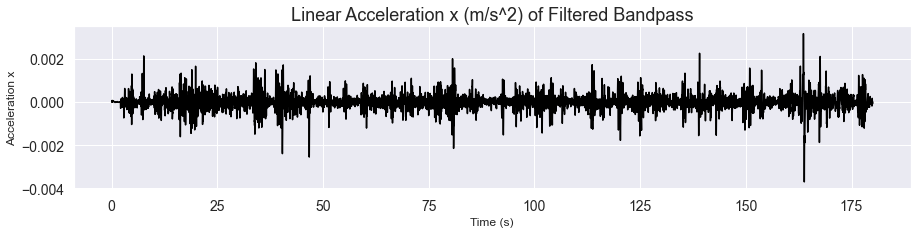

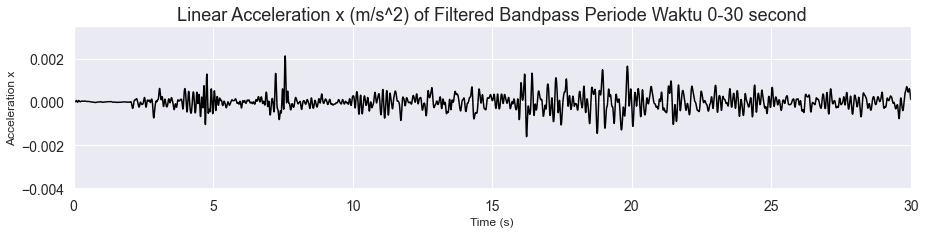

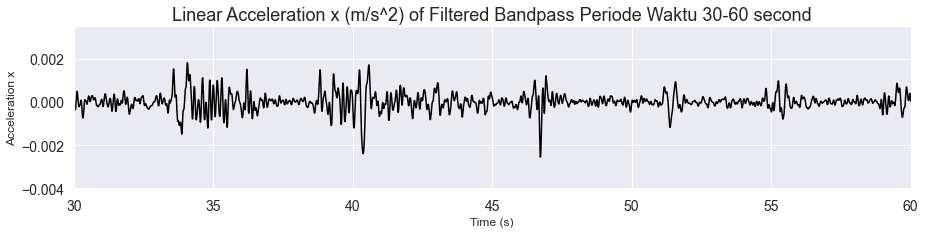

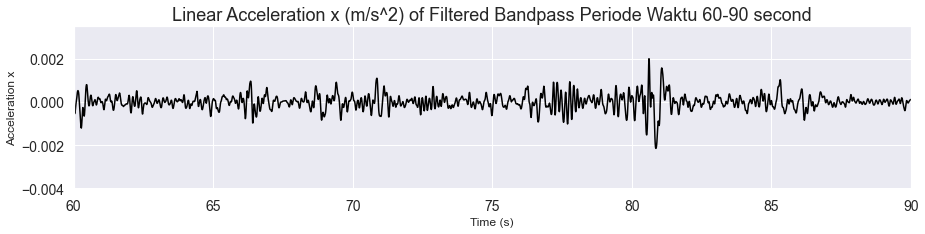

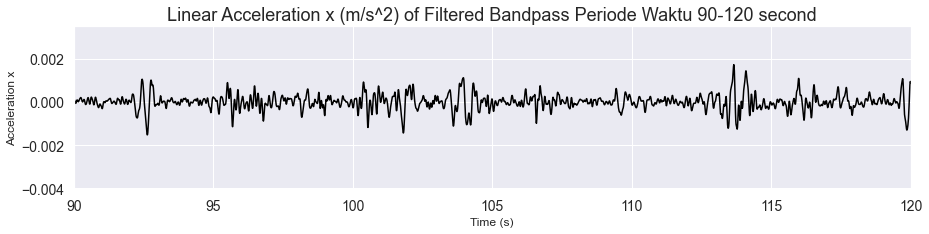

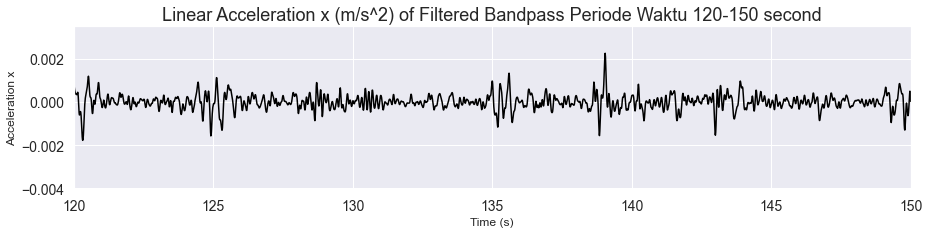

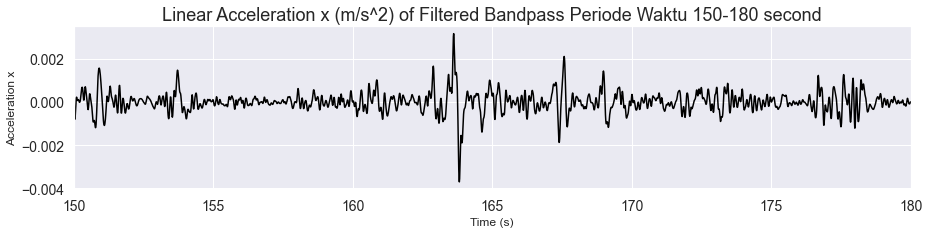

In [11]:
f_low_Ax = 0.1 #Cutoff bawah 
f_high_Ax =10 #Cutoff atas
fs_Ax = 1/Tx #Sampling Frequency 

#Band pass filter
# Filtered Data
filter_Ax = butter_bandpass_filter2(Ax,f_low_Ax, f_high_Ax, fs_Ax, order=4) 
 
##response
b, a = butter_bandpass(f_low_Ax,f_high_Ax, fs_Ax, order=4)
# Plot the frequency response.
w, h = freqz(b, a, worN=64)

plt.subplots(figsize=(15,3))
plt.plot(waktu,Ax,color = 'black')
plt.xlabel("Time (S)")
plt.ylabel("Acceleration x")
plt.title('Acceleration x (m/s^2)')
plt.show()  

plt.subplots(figsize=(15,3))
plt.plot(waktu,filter_Ax,color = 'black')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration x")
plt.title('Linear Acceleration x (m/s^2) of Filtered Bandpass')
plt.show()

plt.subplots(figsize=(15,3))
plt.plot(waktu,filter_Ax,color = 'black')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration x")
plt.title('Linear Acceleration x (m/s^2) of Filtered Bandpass Periode Waktu 0-30 second')
plt.xlim([0, 30])
plt.show()

plt.subplots(figsize=(15,3))
plt.plot(waktu,filter_Ax,color = 'black')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration x")
plt.title('Linear Acceleration x (m/s^2) of Filtered Bandpass Periode Waktu 30-60 second')
plt.xlim([30, 60])
plt.show()

plt.subplots(figsize=(15,3))
plt.plot(waktu,filter_Ax,color = 'black')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration x")
plt.title('Linear Acceleration x (m/s^2) of Filtered Bandpass Periode Waktu 60-90 second')
plt.xlim([60, 90])
plt.show()

plt.subplots(figsize=(15,3))
plt.plot(waktu,filter_Ax,color = 'black')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration x")
plt.title('Linear Acceleration x (m/s^2) of Filtered Bandpass Periode Waktu 90-120 second')
plt.xlim([90, 120])
plt.show()

plt.subplots(figsize=(15,3))
plt.plot(waktu,filter_Ax,color = 'black')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration x")
plt.title('Linear Acceleration x (m/s^2) of Filtered Bandpass Periode Waktu 120-150 second')
plt.xlim([120, 150])
plt.show()

plt.subplots(figsize=(15,3))
plt.plot(waktu,filter_Ax,color = 'black')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration x")
plt.title('Linear Acceleration x (m/s^2) of Filtered Bandpass Periode Waktu 150-180 second')
plt.xlim([150, 180])
plt.show()

In [12]:
print("================== Linear Acceleration x Clasification ==================")
sumx1 = 0 
ratax1 = 0
for x in range(0,3000):
    if(filter_Ax[x]>=0):
        sumx1 = sumx1 + filter_Ax[x]

ratax1 = sumx1/3000        
print ("Rata-Rata Periode Ke 1 Yaitu Detik 0-30    : ",ratax1)

sumx2 = 0 
ratax2 = 0
for x in range(3000,6000):
    if(filter_Ax[x]>=0):
        sumx2 = sumx2 + filter_Ax[x]
        
ratax2 = sumx2/3000
print ("Rata-Rata Periode Ke 2 Yaitu Detik 30-60   : ",ratax2)

sumx3 = 0 
ratax3 = 0
for x in range(6000,9000):
    if(filter_Ax[x]>=0):
        sumx3 = sumx3 + filter_Ax[x]
        
ratax3 = sumx3/3000
print ("Rata-Rata Periode Ke 3 Yaitu Detik 60-90   : ",ratax3)

sumx4 = 0 
ratax4 = 0
for x in range(9000,12000):
    if(filter_Ax[x]>=0):
        sumx4 = sumx4 + filter_Ax[x]
        
ratax4 = sumx4/3000
print ("Rata-Rata Periode Ke 4 Yaitu Detik 90-120  : ",ratax4)

sumx5 = 0 
ratax5 = 0
for x in range(12000,15000):
    if(filter_Ax[x]>=0):
        sumx5 = sumx5 + filter_Ax[x]

ratax5 = sumx5/3000
print ("Rata-Rata Periode Ke 5 Yaitu Detik 120-150 : ",ratax5)

sumx6 = 0 
ratax6 = 0
for x in range(15000,17756):
    if(filter_Ax[x]>=0):
        sumx6 = sumx6 + filter_Ax[x]
        
ratax6 = sumx6/(17756-15000)
print ("Rata-Rata Periode Ke 6 Yaitu Detik 150-180 : ",ratax6)

================== Linear Acceleration x Clasification ==================
Rata-Rata Periode Ke 1 Yaitu Detik 0-30    :  0.0001228585552309629
Rata-Rata Periode Ke 2 Yaitu Detik 30-60   :  0.00013105428576485345
Rata-Rata Periode Ke 3 Yaitu Detik 60-90   :  0.00011396477449184393
Rata-Rata Periode Ke 4 Yaitu Detik 90-120  :  0.00012616470121481812
Rata-Rata Periode Ke 5 Yaitu Detik 120-150 :  0.00012508102531442967
Rata-Rata Periode Ke 6 Yaitu Detik 150-180 :  0.0001536609280330769


## Mencari Ranking Rata-Rata Periode Acceleration x

In [13]:
data_Rata_Rata_Ax = [ratax1,ratax2,ratax3,ratax4,ratax5,ratax6]
ranking_Ax = sorted(data_Rata_Rata_Ax)
data_klasifikasi = ['Sepeda Motor 1 Orang','Sepeda Motor 2 Orang','Mobil 1 Orang','Mobil 4-6 Orang','Truck Kosong','Truck Full Kapasistas']

for x in range(0,len(ranking_Ax)):
    if(ranking_Ax[x]==ratax1):
        print("Periode Ke - 1     =  0-30 Detik")
        print("Rata-Rata          = ",ranking_Ax[x])
        print("Prediksi Kendaraan = ",data_klasifikasi[x])
        
print("")

for x in range(0,len(ranking_Ax)):
    if(ranking_Ax[x]==ratax2):
        print("Periode Ke - 2     =  30-60 Detik")
        print("Rata-Rata          = ",ranking_Ax[x])
        print("Prediksi Kendaraan = ",data_klasifikasi[x])
        
print("")

for x in range(0,len(ranking_Ax)):
    if(ranking_Ax[x]==ratax3):
        print("Periode Ke - 3     =  60-90 Detik")
        print("Rata-Rata          = ",ranking_Ax[x])
        print("Prediksi Kendaraan = ",data_klasifikasi[x])
        
print("")

for x in range(0,len(ranking_Ax)):
    if(ranking_Ax[x]==ratax4):
        print("Periode Ke - 4     =  90-120 Detik")
        print("Rata-Rata          = ",ranking_Ax[x])
        print("Prediksi Kendaraan = ",data_klasifikasi[x])
        
        
print("")

for x in range(0,len(ranking_Ax)):
    if(ranking_Ax[x]==ratax5):
        print("Periode Ke - 5     =  120-150 Detik")
        print("Rata-Rata          = ",ranking_Ax[x])
        print("Prediksi Kendaraan = ",data_klasifikasi[x])
        
print("")

for x in range(0,len(ranking_Ax)):
    if(ranking_Ax[x]==ratax6):
        print("Periode Ke - 6     =  150-180 Detik")
        print("Rata-Rata          = ",ranking_Ax[x])
        print("Prediksi Kendaraan = ",data_klasifikasi[x])

Periode Ke - 1     =  0-30 Detik
Rata-Rata          =  0.0001228585552309629
Prediksi Kendaraan =  Sepeda Motor 2 Orang

Periode Ke - 2     =  30-60 Detik
Rata-Rata          =  0.00013105428576485345
Prediksi Kendaraan =  Truck Kosong

Periode Ke - 3     =  60-90 Detik
Rata-Rata          =  0.00011396477449184393
Prediksi Kendaraan =  Sepeda Motor 1 Orang

Periode Ke - 4     =  90-120 Detik
Rata-Rata          =  0.00012616470121481812
Prediksi Kendaraan =  Mobil 4-6 Orang

Periode Ke - 5     =  120-150 Detik
Rata-Rata          =  0.00012508102531442967
Prediksi Kendaraan =  Mobil 1 Orang

Periode Ke - 6     =  150-180 Detik
Rata-Rata          =  0.0001536609280330769
Prediksi Kendaraan =  Truck Full Kapasistas


## APLIKASI CLASSIFICATION Linear Acceleration Y

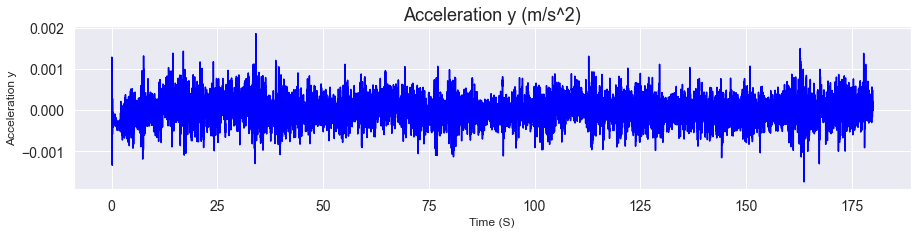

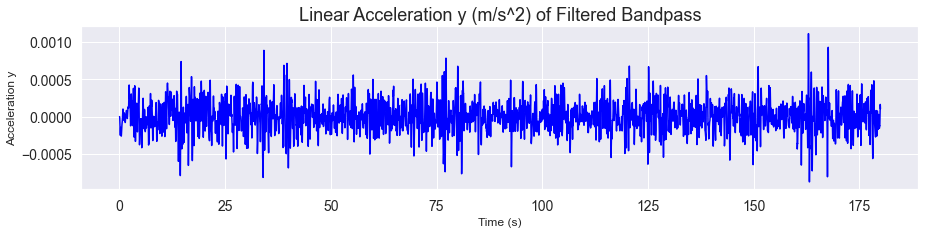

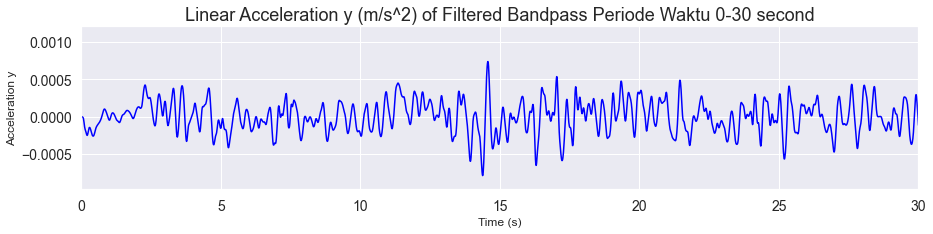

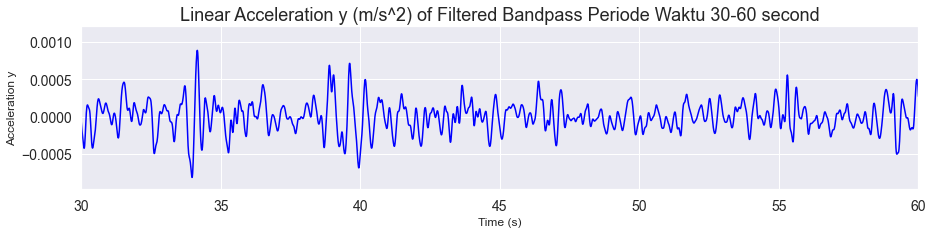

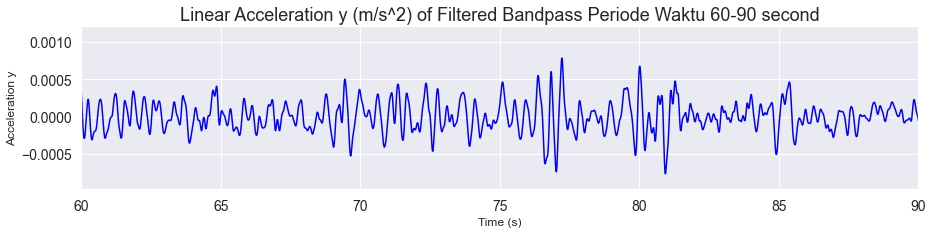

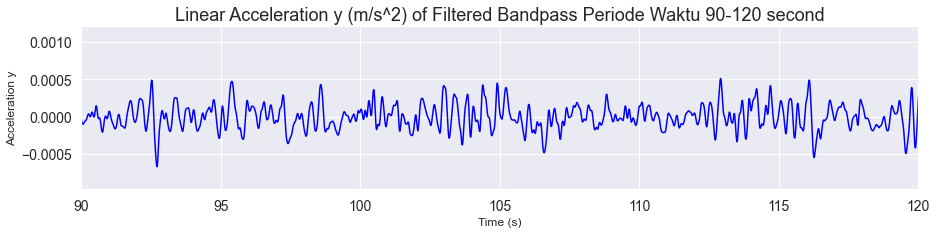

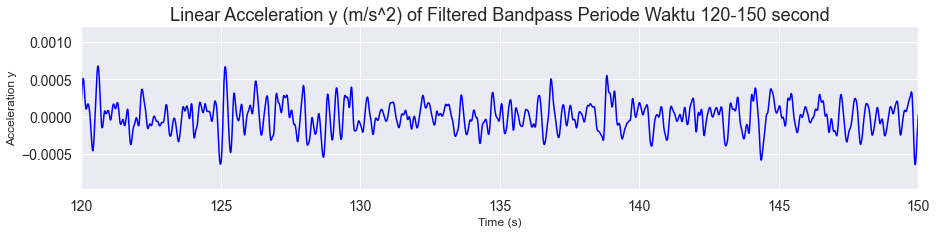

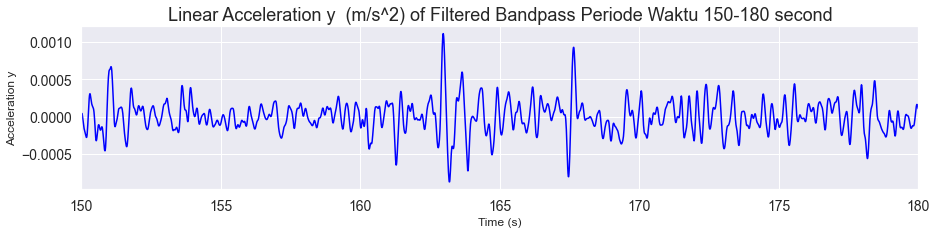

In [14]:
f_low_Ay = 0.1 #Cutoff bawah 
f_high_Ay = 5 #Cutoff atas
fs_Ay = 1/Ty #Sampling Frequency 

#Band pass filter
# Filtered Data
filter_Ay = butter_bandpass_filter2(Ay,f_low_Ay, f_high_Ay, fs_Ay, order=4) 
 
##response
b, a = butter_bandpass(f_low_Ay,f_high_Ay, fs_Ay, order=4)
# Plot the frequency response.
w, h = freqz(b, a, worN=64)

plt.subplots(figsize=(15,3))
plt.plot(waktu,Ay,color = 'blue')
plt.xlabel("Time (S)")
plt.ylabel("Acceleration y")
plt.title('Acceleration y (m/s^2)')
plt.show()  

plt.subplots(figsize=(15,3))
plt.plot(waktu,filter_Ay,color = 'blue')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration y")
plt.title('Linear Acceleration y (m/s^2) of Filtered Bandpass')
plt.show()

plt.subplots(figsize=(15,3))
plt.plot(waktu,filter_Ay,color = 'blue')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration y")
plt.title('Linear Acceleration y (m/s^2) of Filtered Bandpass Periode Waktu 0-30 second')
plt.xlim([0, 30])
plt.show()

plt.subplots(figsize=(15,3))
plt.plot(waktu,filter_Ay,color = 'blue')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration y")
plt.title('Linear Acceleration y (m/s^2) of Filtered Bandpass Periode Waktu 30-60 second')
plt.xlim([30, 60])
plt.show()

plt.subplots(figsize=(15,3))
plt.plot(waktu,filter_Ay,color = 'blue')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration y")
plt.title('Linear Acceleration y (m/s^2) of Filtered Bandpass Periode Waktu 60-90 second')
plt.xlim([60, 90])
plt.show()

plt.subplots(figsize=(15,3))
plt.plot(waktu,filter_Ay,color = 'blue')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration y")
plt.title('Linear Acceleration y (m/s^2) of Filtered Bandpass Periode Waktu 90-120 second')
plt.xlim([90, 120])
plt.show()

plt.subplots(figsize=(15,3))
plt.plot(waktu,filter_Ay,color = 'blue')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration y")
plt.title('Linear Acceleration y (m/s^2) of Filtered Bandpass Periode Waktu 120-150 second')
plt.xlim([120, 150])
plt.show()

plt.subplots(figsize=(15,3))
plt.plot(waktu,filter_Ay,color = 'blue')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration y")
plt.title('Linear Acceleration y  (m/s^2) of Filtered Bandpass Periode Waktu 150-180 second')
plt.xlim([150, 180])
plt.show()

In [15]:
print("================== Linear Acceleration y Clasification ==================")
sumy1 = 0 
ratay1 = 0
for x in range(0,3000):
    if(filter_Ay[x]>=0):
        sumy1 = sumy1 + filter_Ay[x]

ratay1 = sumy1/3000        
print ("Rata-Rata Periode Ke 1 Yaitu Detik 0-30    : ",ratay1)

sumy2 = 0 
ratay2 = 0
for x in range(3000,6000):
    if(filter_Ay[x]>=0):
        sumy2 = sumy2 + filter_Ay[x]
        
ratay2 = sumy2/3000
print ("Rata-Rata Periode Ke 2 Yaitu Detik 30-60   : ",ratay2)

sumy3 = 0 
ratay3 = 0
for x in range(6000,9000):
    if(filter_Ay[x]>=0):
        sumy3 = sumy3 + filter_Ay[x]
        
ratay3 = sumy3/3000
print ("Rata-Rata Periode Ke 3 Yaitu Detik 60-90   : ",ratay3)

sumy4 = 0 
ratay4 = 0
for x in range(9000,12000):
    if(filter_Ay[x]>=0):
        sumy4 = sumy4 + filter_Ay[x]
        
ratay4 = sumy4/3000
print ("Rata-Rata Periode Ke 4 Yaitu Detik 90-120  : ",ratay4)

sumy5 = 0 
ratay5 = 0
for x in range(12000,15000):
    if(filter_Ay[x]>=0):
        sumy5 = sumy5 + filter_Ay[x]

ratay5 = sumy5/3000
print ("Rata-Rata Periode Ke 5 Yaitu Detik 120-150 : ",ratay5)

sumy6 = 0 
ratay6 = 0
for x in range(15000,17756):
    if(filter_Ay[x]>=0):
        sumy6 = sumy6 + filter_Ay[x]
        
ratay6 = sumy6/(17756-15000)
print ("Rata-Rata Periode Ke 6 Yaitu Detik 150-180 : ",ratay6)

================== Linear Acceleration y Clasification ==================
Rata-Rata Periode Ke 1 Yaitu Detik 0-30    :  8.128113458674513e-05
Rata-Rata Periode Ke 2 Yaitu Detik 30-60   :  7.583868310076104e-05
Rata-Rata Periode Ke 3 Yaitu Detik 60-90   :  7.59808756217604e-05
Rata-Rata Periode Ke 4 Yaitu Detik 90-120  :  6.847801409837671e-05
Rata-Rata Periode Ke 5 Yaitu Detik 120-150 :  7.515379284917109e-05
Rata-Rata Periode Ke 6 Yaitu Detik 150-180 :  7.695744139444911e-05


In [16]:
data_Rata_Rata_Ay = [ratay1,ratay2,ratay3,ratay4,ratay5,ratay6]
ranking_Ay = sorted(data_Rata_Rata_Ay)
data_klasifikasi = ['Sepeda Motor 1 Orang','Sepeda Motor 2 Orang','Mobil 1 Orang','Mobil 4-6 Orang','Truck Kosong','Truck Full Kapasistas']

for x in range(0,len(ranking_Ay)):
    if(ranking_Ay[x]==ratay1):
        print("Periode Ke - 1     =  0-30 Detik")
        print("Rata-Rata          = ",ranking_Ay[x])
        print("Prediksi Kendaraan = ",data_klasifikasi[x])
        
print("")

for x in range(0,len(ranking_Ay)):
    if(ranking_Ay[x]==ratay2):
        print("Periode Ke - 2     =  30-60 Detik")
        print("Rata-Rata          = ",ranking_Ay[x])
        print("Prediksi Kendaraan = ",data_klasifikasi[x])
        
print("")

for x in range(0,len(ranking_Ay)):
    if(ranking_Ay[x]==ratay3):
        print("Periode Ke - 3     =  60-90 Detik")
        print("Rata-Rata          = ",ranking_Ay[x])
        print("Prediksi Kendaraan = ",data_klasifikasi[x])
        
print("")

for x in range(0,len(ranking_Ay)):
    if(ranking_Ay[x]==ratay4):
        print("Periode Ke - 4     =  90-120 Detik")
        print("Rata-Rata          = ",ranking_Ay[x])
        print("Prediksi Kendaraan = ",data_klasifikasi[x])
        
        
print("")

for x in range(0,len(ranking_Ay)):
    if(ranking_Ay[x]==ratay5):
        print("Periode Ke - 5     =  120-150 Detik")
        print("Rata-Rata          = ",ranking_Ay[x])
        print("Prediksi Kendaraan = ",data_klasifikasi[x])
        
print("")

for x in range(0,len(ranking_Ay)):
    if(ranking_Ay[x]==ratay6):
        print("Periode Ke - 6     =  150-180 Detik")
        print("Rata-Rata          = ",ranking_Ay[x])
        print("Prediksi Kendaraan = ",data_klasifikasi[x])

Periode Ke - 1     =  0-30 Detik
Rata-Rata          =  8.128113458674513e-05
Prediksi Kendaraan =  Truck Full Kapasistas

Periode Ke - 2     =  30-60 Detik
Rata-Rata          =  7.583868310076104e-05
Prediksi Kendaraan =  Mobil 1 Orang

Periode Ke - 3     =  60-90 Detik
Rata-Rata          =  7.59808756217604e-05
Prediksi Kendaraan =  Mobil 4-6 Orang

Periode Ke - 4     =  90-120 Detik
Rata-Rata          =  6.847801409837671e-05
Prediksi Kendaraan =  Sepeda Motor 1 Orang

Periode Ke - 5     =  120-150 Detik
Rata-Rata          =  7.515379284917109e-05
Prediksi Kendaraan =  Sepeda Motor 2 Orang

Periode Ke - 6     =  150-180 Detik
Rata-Rata          =  7.695744139444911e-05
Prediksi Kendaraan =  Truck Kosong


## APLIKASI CLASSIFICATION Linear Acceleration Z

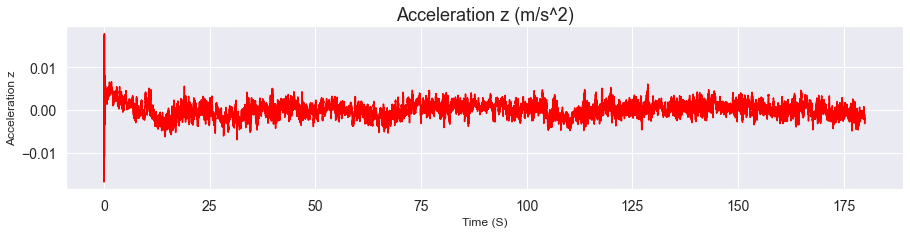

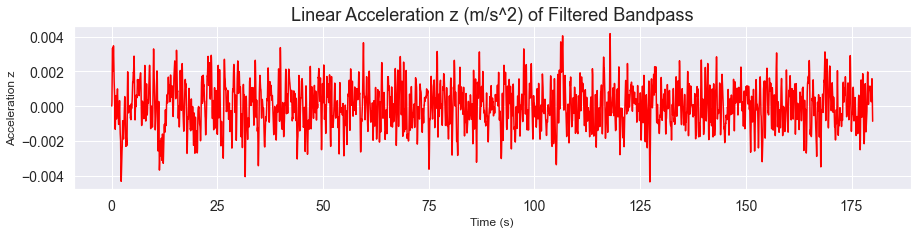

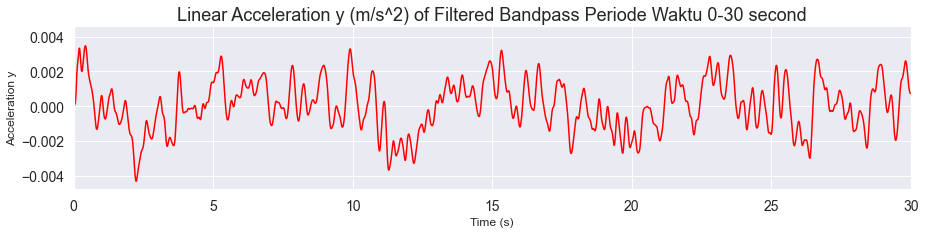

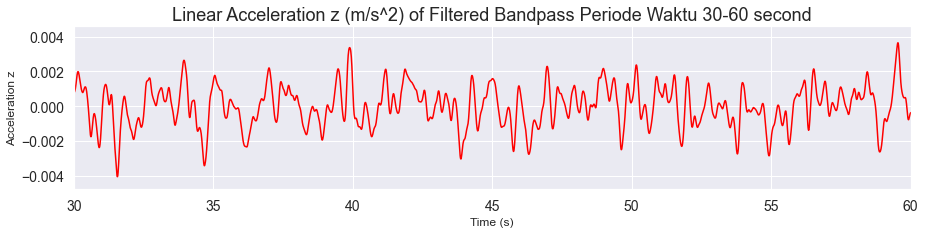

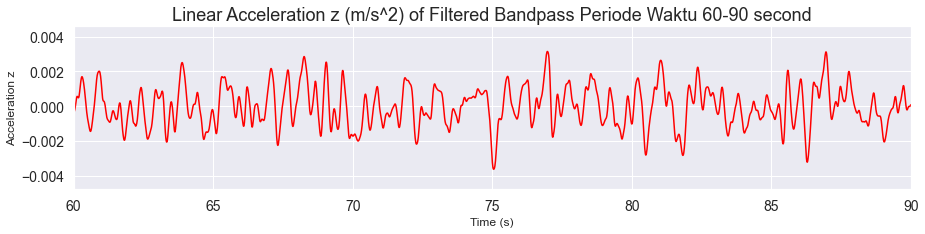

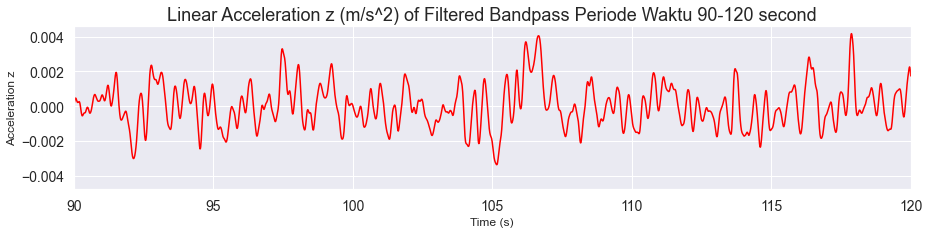

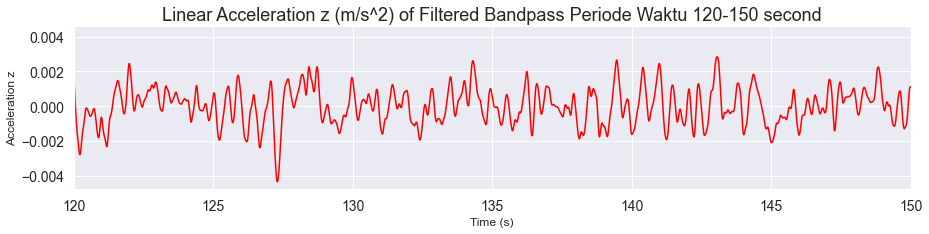

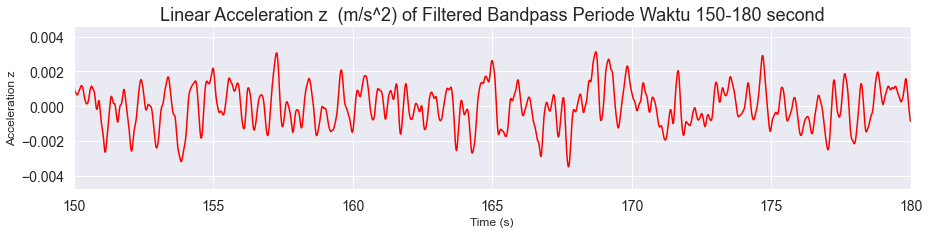

In [17]:
f_low_Az = 0.1 #Cutoff bawah 
f_high_Az = 5 #Cutoff atas
fs_Az = 1/Tz #Sampling Frequency 

#Band pass filter
# Filtered Data
filter_Az = butter_bandpass_filter2(Az,f_low_Az, f_high_Az, fs_Az, order=4) 
 
##response
b, a = butter_bandpass(f_low_Az,f_high_Az, fs_Az, order=4)
# Plot the frequency response.
w, h = freqz(b, a, worN=64)

plt.subplots(figsize=(15,3))
plt.plot(waktu,Az,color = 'red')
plt.xlabel("Time (S)")
plt.ylabel("Acceleration z")
plt.title('Acceleration z (m/s^2)')
plt.show()  

plt.subplots(figsize=(15,3))
plt.plot(waktu,filter_Az,color = 'red')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration z")
plt.title('Linear Acceleration z (m/s^2) of Filtered Bandpass')
plt.show()

plt.subplots(figsize=(15,3))
plt.plot(waktu,filter_Az,color = 'red')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration y")
plt.title('Linear Acceleration y (m/s^2) of Filtered Bandpass Periode Waktu 0-30 second')
plt.xlim([0, 30])
plt.show()

plt.subplots(figsize=(15,3))
plt.plot(waktu,filter_Az,color = 'red')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration z")
plt.title('Linear Acceleration z (m/s^2) of Filtered Bandpass Periode Waktu 30-60 second')
plt.xlim([30, 60])
plt.show()

plt.subplots(figsize=(15,3))
plt.plot(waktu,filter_Az,color = 'red')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration z")
plt.title('Linear Acceleration z (m/s^2) of Filtered Bandpass Periode Waktu 60-90 second')
plt.xlim([60, 90])
plt.show()

plt.subplots(figsize=(15,3))
plt.plot(waktu,filter_Az,color = 'red')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration z")
plt.title('Linear Acceleration z (m/s^2) of Filtered Bandpass Periode Waktu 90-120 second')
plt.xlim([90, 120])
plt.show()

plt.subplots(figsize=(15,3))
plt.plot(waktu,filter_Az,color = 'red')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration z")
plt.title('Linear Acceleration z (m/s^2) of Filtered Bandpass Periode Waktu 120-150 second')
plt.xlim([120, 150])
plt.show()

plt.subplots(figsize=(15,3))
plt.plot(waktu,filter_Az,color = 'red')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration z")
plt.title('Linear Acceleration z  (m/s^2) of Filtered Bandpass Periode Waktu 150-180 second')
plt.xlim([150, 180])
plt.show()

In [18]:
print("================== Linear Acceleration z Clasification ==================")
sumz1 = 0 
rataz1 = 0
for x in range(0,3000):
    if(filter_Az[x]>=0):
        sumz1 = sumz1 + filter_Az[x]

rataz1 = sumz1/3000        
print ("Rata-Rata Periode Ke 1 Yaitu Detik 0-30    : ",rataz1)

sumz2 = 0 
rataz2 = 0
for x in range(3000,6000):
    if(filter_Az[x]>=0):
        sumz2 = sumz2 + filter_Az[x]
        
rataz2 = sumz2/3000
print ("Rata-Rata Periode Ke 2 Yaitu Detik 30-60   : ",rataz2)

sumz3 = 0 
rataz3 = 0
for x in range(6000,9000):
    if(filter_Az[x]>=0):
        sumz3 = sumz3 + filter_Az[x]
        
rataz3 = sumz3/3000
print ("Rata-Rata Periode Ke 3 Yaitu Detik 60-90   : ",rataz3)

sumz4 = 0 
rataz4 = 0
for x in range(9000,12000):
    if(filter_Az[x]>=0):
        sumz4 = sumz4 + filter_Az[x]
        
rataz4 = sumz4/3000
print ("Rata-Rata Periode Ke 4 Yaitu Detik 90-120  : ",rataz4)

sumz5 = 0 
rataz5 = 0
for x in range(12000,15000):
    if(filter_Az[x]>=0):
        sumz5 = sumz5 + filter_Az[x]

rataz5 = sumz5/3000
print ("Rata-Rata Periode Ke 5 Yaitu Detik 120-150 : ",rataz5)

sumz6 = 0 
rataz6 = 0
for x in range(15000,17756):
    if(filter_Az[x]>=0):
        sumz6 = sumz6 + filter_Az[x]
        
rataz6 = sumz6/(17756-15000)
print ("Rata-Rata Periode Ke 6 Yaitu Detik 150-180 : ",rataz6)

================== Linear Acceleration z Clasification ==================
Rata-Rata Periode Ke 1 Yaitu Detik 0-30    :  0.0005987225828874627
Rata-Rata Periode Ke 2 Yaitu Detik 30-60   :  0.0004513411494919367
Rata-Rata Periode Ke 3 Yaitu Detik 60-90   :  0.0004424020849218419
Rata-Rata Periode Ke 4 Yaitu Detik 90-120  :  0.0004755507285605102
Rata-Rata Periode Ke 5 Yaitu Detik 120-150 :  0.00042573827997504596
Rata-Rata Periode Ke 6 Yaitu Detik 150-180 :  0.0004743693941934892


In [19]:
data_Rata_Rata_Az = [rataz1,rataz2,rataz3,rataz4,rataz5,rataz6]
ranking_Az = sorted(data_Rata_Rata_Az)
data_klasifikasi = ['Sepeda Motor 1 Orang','Sepeda Motor 2 Orang','Mobil 1 Orang','Mobil 4-6 Orang','Truck Kosong','Truck Full Kapasistas']

for x in range(0,len(ranking_Az)):
    if(ranking_Az[x]==rataz1):
        print("Periode Ke - 1     =  0-30 Detik")
        print("Rata-Rata          = ",ranking_Az[x])
        print("Prediksi Kendaraan = ",data_klasifikasi[x])
        
print("")

for x in range(0,len(ranking_Az)):
    if(ranking_Az[x]==rataz2):
        print("Periode Ke - 2     =  30-60 Detik")
        print("Rata-Rata          = ",ranking_Az[x])
        print("Prediksi Kendaraan = ",data_klasifikasi[x])
        
print("")

for x in range(0,len(ranking_Az)):
    if(ranking_Az[x]==rataz3):
        print("Periode Ke - 3     =  60-90 Detik")
        print("Rata-Rata          = ",ranking_Az[x])
        print("Prediksi Kendaraan = ",data_klasifikasi[x])
        
print("")

for x in range(0,len(ranking_Az)):
    if(ranking_Az[x]==rataz4):
        print("Periode Ke - 4     =  90-120 Detik")
        print("Rata-Rata          = ",ranking_Az[x])
        print("Prediksi Kendaraan = ",data_klasifikasi[x])
        
        
print("")

for x in range(0,len(ranking_Az)):
    if(ranking_Az[x]==rataz5):
        print("Periode Ke - 5     =  120-150 Detik")
        print("Rata-Rata          = ",ranking_Az[x])
        print("Prediksi Kendaraan = ",data_klasifikasi[x])
        
print("")

for x in range(0,len(ranking_Az)):
    if(ranking_Az[x]==rataz6):
        print("Periode Ke - 6     =  150-180 Detik")
        print("Rata-Rata          = ",ranking_Az[x])
        print("Prediksi Kendaraan = ",data_klasifikasi[x])

Periode Ke - 1     =  0-30 Detik
Rata-Rata          =  0.0005987225828874627
Prediksi Kendaraan =  Truck Full Kapasistas

Periode Ke - 2     =  30-60 Detik
Rata-Rata          =  0.0004513411494919367
Prediksi Kendaraan =  Mobil 1 Orang

Periode Ke - 3     =  60-90 Detik
Rata-Rata          =  0.0004424020849218419
Prediksi Kendaraan =  Sepeda Motor 2 Orang

Periode Ke - 4     =  90-120 Detik
Rata-Rata          =  0.0004755507285605102
Prediksi Kendaraan =  Truck Kosong

Periode Ke - 5     =  120-150 Detik
Rata-Rata          =  0.00042573827997504596
Prediksi Kendaraan =  Sepeda Motor 1 Orang

Periode Ke - 6     =  150-180 Detik
Rata-Rata          =  0.0004743693941934892
Prediksi Kendaraan =  Mobil 4-6 Orang


## HASIL RATA RATA Acceleration X,Y,Z dan Klasifikasi Data 

In [21]:
data_Rata_Rata_Axyz = [(sum([ratax1,ratay1,rataz1])/3),(sum([ratax2,ratay2,rataz2])/3),(sum([ratax3,ratay3,rataz3])/3),
                     (sum([ratax4,ratay4,rataz4])/3),(sum([ratax5,ratay5,rataz5])/3),(sum([ratax6,ratay6,rataz6])/3)]
ranking_Axyz = sorted(data_Rata_Rata_Axyz)
data_klasifikasi = ['Sepeda Motor 1 Orang','Sepeda Motor 2 Orang','Mobil 1 Orang','Mobil 4-6 Orang','Truck Kosong','Truck Full Kapasistas']

for x in range(0,len(ranking_Axyz)):
    if(ranking_Axyz[x]==(sum([ratax1,ratay1,rataz1])/3)):
        print("Periode Ke - 1     =  0-30 Detik")
        print("Rata-Rata          = ",ranking_Axyz[x])
        print("Prediksi Kendaraan = ",data_klasifikasi[x])
        
print("")

for x in range(0,len(ranking_Axyz)):
    if(ranking_Axyz[x]==(sum([ratax2,ratay2,rataz2])/3)):
        print("Periode Ke - 2     =  30-60 Detik")
        print("Rata-Rata          = ",ranking_Axyz[x])
        print("Prediksi Kendaraan = ",data_klasifikasi[x])
        
print("")

for x in range(0,len(ranking_Axyz)):
    if(ranking_Axyz[x]==(sum([ratax3,ratay3,rataz3])/3)):
        print("Periode Ke - 3     =  60-90 Detik")
        print("Rata-Rata          = ",ranking_Axyz[x])
        print("Prediksi Kendaraan = ",data_klasifikasi[x])
        
print("")

for x in range(0,len(ranking_Axyz)):
    if(ranking_Axyz[x]==(sum([ratax4,ratay4,rataz4])/3)):
        print("Periode Ke - 4     =  90-120 Detik")
        print("Rata-Rata          = ",ranking_Axyz[x])
        print("Prediksi Kendaraan = ",data_klasifikasi[x])
        
print("")

for x in range(0,len(ranking_Axyz)):
    if(ranking_Axyz[x]==(sum([ratax5,ratay5,rataz5])/3)):
        print("Periode Ke - 5     =  120-150 Detik")
        print("Rata-Rata          = ",ranking_Axyz[x])
        print("Prediksi Kendaraan = ",data_klasifikasi[x])
        
print("")

for x in range(0,len(ranking_Axyz)):
    if(ranking_Axyz[x]==(sum([ratax6,ratay6,rataz6])/3)):
        print("Periode Ke - 6     =  150-180 Detik")
        print("Rata-Rata          = ",ranking_Axyz[x])
        print("Prediksi Kendaraan = ",data_klasifikasi[x])
        


Periode Ke - 1     =  0-30 Detik
Rata-Rata          =  0.0002676207575683902
Prediksi Kendaraan =  Truck Full Kapasistas

Periode Ke - 2     =  30-60 Detik
Rata-Rata          =  0.00021941137278585037
Prediksi Kendaraan =  Mobil 1 Orang

Periode Ke - 3     =  60-90 Detik
Rata-Rata          =  0.00021078257834514875
Prediksi Kendaraan =  Sepeda Motor 2 Orang

Periode Ke - 4     =  90-120 Detik
Rata-Rata          =  0.00022339781462456837
Prediksi Kendaraan =  Mobil 4-6 Orang

Periode Ke - 5     =  120-150 Detik
Rata-Rata          =  0.00020865769937954888
Prediksi Kendaraan =  Sepeda Motor 1 Orang

Periode Ke - 6     =  150-180 Detik
Rata-Rata          =  0.00023499592120700507
Prediksi Kendaraan =  Truck Kosong
